# Second Order finite difference scheme for two point Boundary value Problem


Given Equation: -U''(x) = f(x);  u(0) = 0, u'(1) = 1.
We have to define two schemes S1 and S2 for approximating the solution of this problem.
By S1: (Un+1 - Un)/h = 1
By S2: (Un+2 - Un)/2h = 1

We know by second order finite difference scheme that U''(x) = (Uj-1 - 2Uj + Uj+1)/h^2

Using above two boundary value conditions in S1 and S2, we can find relations as below:-
Un - Un-1 = h + h^2 f(Xn) for Scheme S1.

Un - Un-1 = h^2 f(Xn) + h + (h^2/2) f(Xn+1) for scheme S2.

[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  1.]]
[[-0.44932896 -0.54881164 -0.67032005 -0.81873075]]
[[-0.01797316 -0.02195247 -0.0268128   0.16725077]]
[[-0.01797316 -0.02195247 -0.0268128   0.14725077]]
[[0.10051234]
 [0.21899785]
 [0.35943581]
 [0.52668658]]
[[0.08051234]
 [0.17899785]
 [0.29943581]
 [0.44668658]]


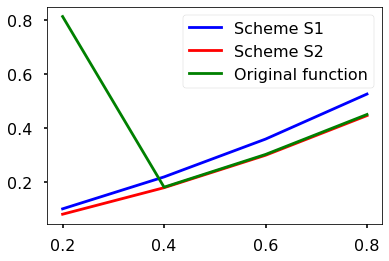

In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline
h = 0.2
n = 4
X = [0.2,0.4,0.6,0.8]
F = np.zeros((1,4))
A = np.zeros((n,n))
A[0,0] = 2
A[0,1] = -1
A[n-1,n-2] = -1
A[n-1,n-1] = 1
for i in range(1,n-1):
    A[i,i-1] = -1
    A[i,i] = 2
    A[i,i+1] = -1
print(A) 
for index, value in enumerate(X):
    F[0,index] = -1* pow(np.e, value-1)
print(F)  

# Now we will define b for scheme S1
b = np.zeros((1,n))
for i in range(n):
    b[0,i] = h**2 * F[0,i]
b[0,3] = b[0,3] + h    
print(b)    

#Defining b for scheme S2
B = np.zeros((1,n))
for i in range(n):
    B[0,i] = h**2 * F[0,i]
B[0,3] = B[0,3] + h + ((h**2 * -1)/2)
print(B)

# Now we will solve linear equations for both schemes
y = np.linalg.solve(A,b.T)
print(y)
Y = np.linalg.solve(A,B.T)
print(Y)

U = [0.8144,0.1809,0.3024,0.4508]
plt.plot(X,y, color='b', label= 'Scheme S1')
plt.plot(X,Y, color = 'r', label = 'Scheme S2')
plt.plot(X,U, color = 'g', label = 'Original function')


plt.legend()
    
    
    




In [40]:
# For finding error in both schemes
# From graph, we can see that largest difference is at x = 0.2
E1 = 0.8144 - 0.10051234
print(E1)
E2 = 0.8144 - 0.08051234
print(E2)

0.71388766
0.73388766
